In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

Data=pd.read_csv("./Fuel consumption 2019.csv")
Data.head(10)

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261
5,2019,Acura,RDX AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,232
6,2019,Acura,RDX AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,242
7,2019,Acura,RLX Hybrid,Mid-size,3.5,6,AM7,Z,8.4,8.2,8.4,196
8,2019,Acura,TLX,Compact,2.4,4,AM8,Z,10.0,7.1,8.7,205
9,2019,Acura,TLX A-SPEC,Compact,2.4,4,AM8,Z,10.2,7.4,8.9,209


In [5]:
Data.columns

Index(['Model-Year', 'Make', 'Model', 'Vehicle-Class', 'Engine-Size',
       'Cylinders', 'Transmission', 'Fuel-Type', 'Fuel-Consumption-City',
       'Fuel-Consumption-Hwy', 'Fuel-Consumption-Comb', 'CO2-Emissions'],
      dtype='object')

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Model-Year             1046 non-null   int64  
 1   Make                   1046 non-null   object 
 2   Model                  1046 non-null   object 
 3   Vehicle-Class          1046 non-null   object 
 4   Engine-Size            1046 non-null   float64
 5   Cylinders              1046 non-null   int64  
 6   Transmission           1046 non-null   object 
 7   Fuel-Type              1046 non-null   object 
 8   Fuel-Consumption-City  1046 non-null   float64
 9   Fuel-Consumption-Hwy   1046 non-null   float64
 10  Fuel-Consumption-Comb  1046 non-null   float64
 11  CO2-Emissions          1046 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 98.2+ KB


In [3]:
df=pd.DataFrame(data=Data)
df.head()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261


In [10]:
df.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of       Model-Year   Make              Model  Vehicle-Class  Engine-Size  \
0           2019  Acura                ILX        Compact          2.4   
1           2019  Acura         MDX SH-AWD     SUV: Small          3.5   
2           2019  Acura  MDX SH-AWD A-SPEC     SUV: Small          3.5   
3           2019  Acura     MDX Hybrid AWD     SUV: Small          3.0   
4           2019  Acura                NSX     Two-seater          3.5   
...          ...    ...                ...            ...          ...   
1041        2019  Volvo        XC40 T5 AWD     SUV: Small          2.0   
1042        2019  Volvo        XC60 T5 AWD     SUV: Small          2.0   
1043        2019  Volvo        XC60 T6 AWD     SUV: Small          2.0   
1044        2019  Volvo        XC90 T5 AWD  SUV: Standard          2.0   
1045        2019  Volvo        XC90 T6 AWD  SUV: Standard          2.0   

      Cylinders Transmission Fuel-Type  Fuel-Con

In [4]:
df.iloc[[25]]

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
25,2019,Aston Martin,Vantage V8,Two-seater,4.0,8,A8,Z,12.7,9.4,11.2,264


In [11]:
df.describe()

,Model-Year,Engine-Size,Cylinders,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
count,1046.0,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,2019.0,3.108795,5.595602,12.378011,9.038050,10.872562,251.312620
std,0.0,1.315989,1.796845,3.294286,2.049742,2.697321,57.017573
min,2019.0,1.000000,3.000000,4.200000,4.000000,4.100000,96.000000
25%,2019.0,2.000000,4.000000,10.200000,7.600000,9.100000,212.250000
50%,2019.0,3.000000,6.000000,12.050000,8.800000,10.600000,248.000000
75%,2019.0,3.600000,6.000000,14.300000,10.200000,12.575000,289.000000
max,2019.0,8.000000,16.000000,26.800000,17.200000,22.200000,522.000000


In [12]:
df.count()

Model-Year               1046
Make                     1046
Model                    1046
Vehicle-Class            1046
Engine-Size              1046
Cylinders                1046
Transmission             1046
Fuel-Type                1046
Fuel-Consumption-City    1046
Fuel-Consumption-Hwy     1046
Fuel-Consumption-Comb    1046
CO2-Emissions            1046
dtype: int64

In [4]:
Data_new=Data[["Engine-Size","CO2-Emissions"]]

Text(0, 0.5, 'CO2-Emissions')

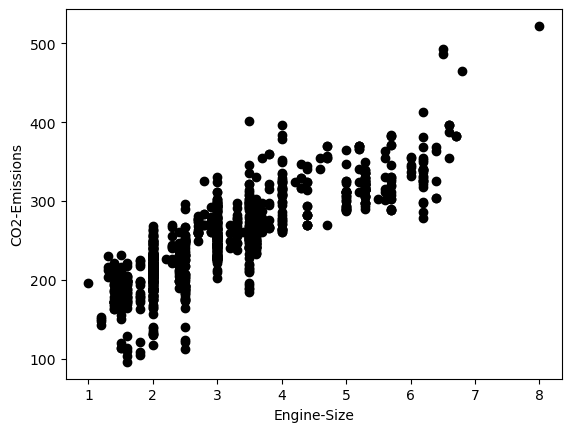

In [21]:
plt.scatter(Data_new["Engine-Size"],Data_new["CO2-Emissions"],color="black")
plt.xlabel("Engine-Size")
plt.ylabel("CO2-Emissions")           

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Data_new,Data_new,train_size=0.8)

In [9]:
regr=linear_model.LinearRegression()
train_x=np.array(X_train[["Engine-Size"]])
train_y=np.array(y_train[["CO2-Emissions"]])
regr.fit(train_x,train_y)

LinearRegression()

In [10]:
print("B1:",regr.coef_)
print("B0:",regr.intercept_)
B0=regr.intercept_
B1=regr.coef_

B1: [[37.05522838]]
B0: [136.04969764]


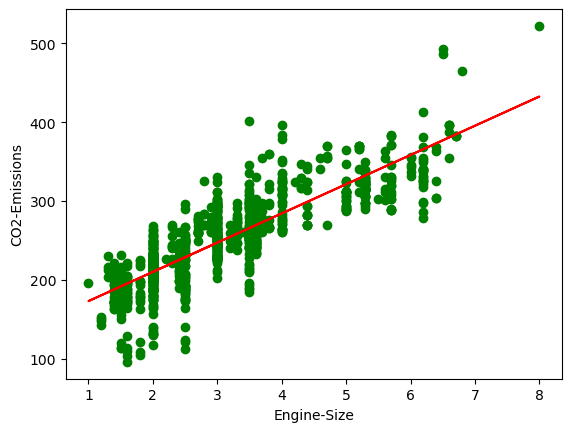

In [20]:
plt.scatter(Data_new["Engine-Size"],Data_new["CO2-Emissions"],color="green")
plt.xlabel("Engine-Size")
plt.ylabel("CO2-Emissions") 
plt.plot(train_x,B0+B1*train_x,"-r")

In [14]:
def get_regression_prediction(input_feature,B0,B1):
    prediction =B0+B1*input_feature 
    return prediction

In [15]:
enginesize=3.5
estimated_Co2Emission=get_regression_prediction(enginesize,B0,B1)
print("Estimated Co2Emissionm:",estimated_Co2Emission)

Estimated Co2Emissionm: [[265.74299697]]


In [22]:
test_x=np.array(X_test[["Engine-Size"]])
test_y=np.array(y_test[["CO2-Emissions"]])
test_yy=regr.predict(test_x)

In [26]:
Error=np.mean((test_y-test_yy)**2)
Error

1083.1649449138426